In [2]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [3]:
env = BlackjackEnv()

In [4]:
state = env.reset()

In [10]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    print 'nA: {}'.format(nA)
    def policy_fn(observation):
        probs = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        probs[best_action] += (1-epsilon)
            
        return probs
        # Implement this!
    return policy_fn

In [13]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function taht takes an observation as an argument and returns
        action probabilities
    """
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
        
        
    print "Q: {}".format(Q)
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    for i_episode in range(1, num_episodes+1):
        episode = []
        state = env.reset()
        
        for t in range(100):
            probs = policy(state)
            action = np.random.choice(np.arange(env.action_space.n), p=probs)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        
        sa_in_episode = set([(tuple(x[0]), x[1]) for x in episode])
        for sa in sa_in_episode:
            state, action = sa
            first_occurance_idx = next(i for i,x in enumerate(episode) if x[0]==state and x[1]==action)
            G = sum([x[2] for x in episode[first_occurance_idx:]])
            returns_sum[sa] += G
            returns_count[sa] += 1
            Q[state][action] = returns_sum[sa]/returns_count[sa]
    # Implement this!
    
    return Q, policy

In [20]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=500000, epsilon=0.1)
policy(state)

Q: defaultdict(<function <lambda> at 0x7fa182ea9758>, {})
nA: 2


array([ 0.95,  0.05])

(18, 6, False)
0
(17, 8, True)
1
(20, 6, False)
0
(13, 1, False)
1
(12, 10, True)
1
(21, 3, True)
0
(12, 5, True)
1
(14, 2, True)
1
(14, 1, True)
1
(13, 4, False)
0
(16, 7, True)
1
(14, 4, False)
0
(14, 6, True)
1
(13, 7, False)
1
(18, 7, True)
0
(19, 10, False)
0
(15, 7, False)
1
(17, 5, False)
0
(13, 10, False)
1
(16, 1, True)
1
(19, 9, False)
0
(20, 9, True)
0
(19, 4, False)
0
(17, 3, False)
0
(21, 8, False)
0
(14, 9, False)
1
(19, 3, False)
0
(18, 4, True)
0
(20, 7, True)
0
(12, 2, False)
0
(14, 10, False)
1
(12, 7, False)
1
(17, 9, False)
0
(15, 8, True)
1
(14, 7, False)
1
(18, 10, True)
0
(12, 4, False)
0
(21, 1, False)
0
(20, 5, True)
0
(13, 5, True)
1
(13, 2, True)
1
(12, 9, False)
1
(15, 1, True)
1
(15, 2, True)
1
(15, 3, True)
1
(16, 3, False)
0
(21, 7, False)
0
(13, 8, True)
1
(15, 4, True)
1
(17, 1, True)
1
(17, 6, True)
1
(20, 8, False)
0
(19, 5, True)
0
(16, 4, True)
1
(15, 3, False)
0
(19, 6, True)
0
(18, 1, False)
0
(21, 9, True)
0
(16, 10, False)
1
(14, 8, True)
1
(15,

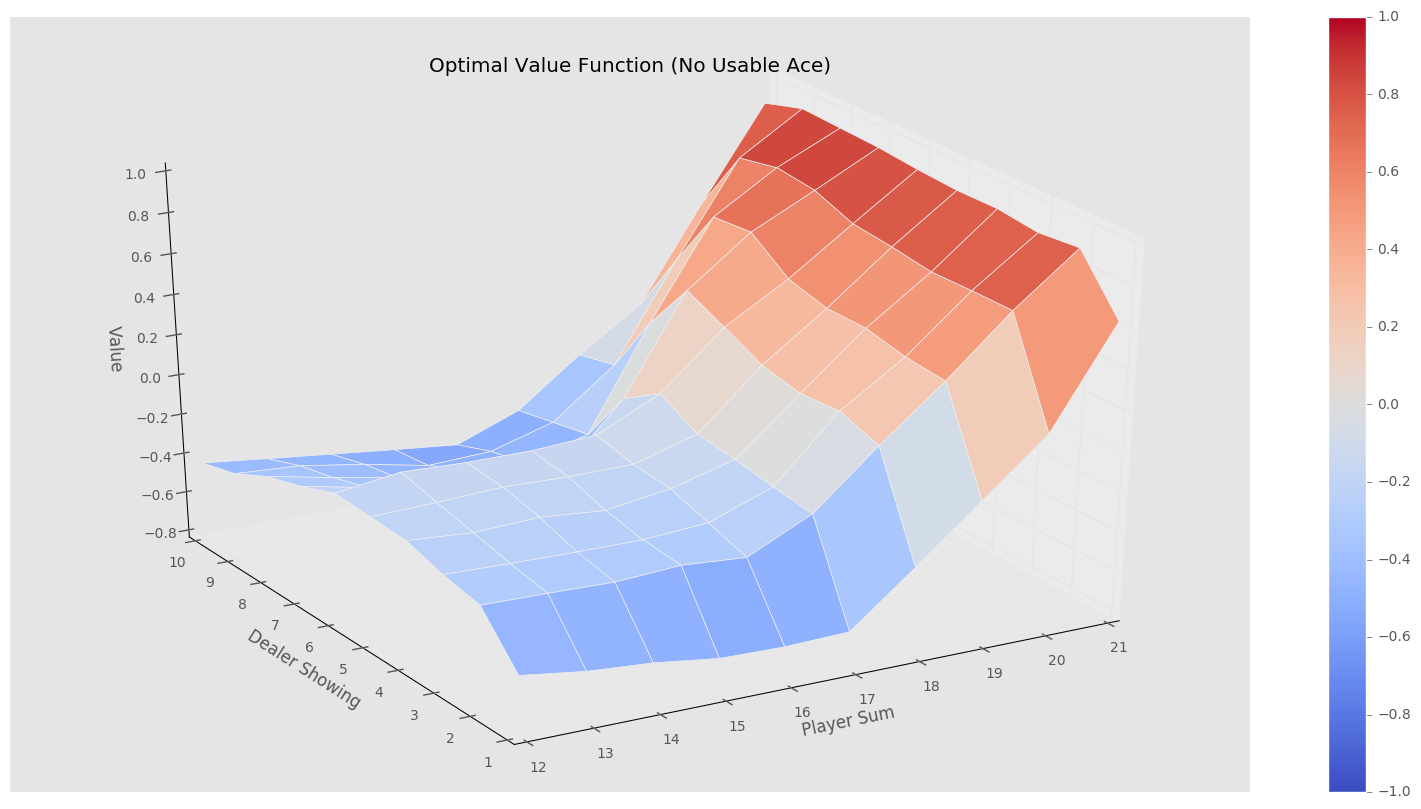

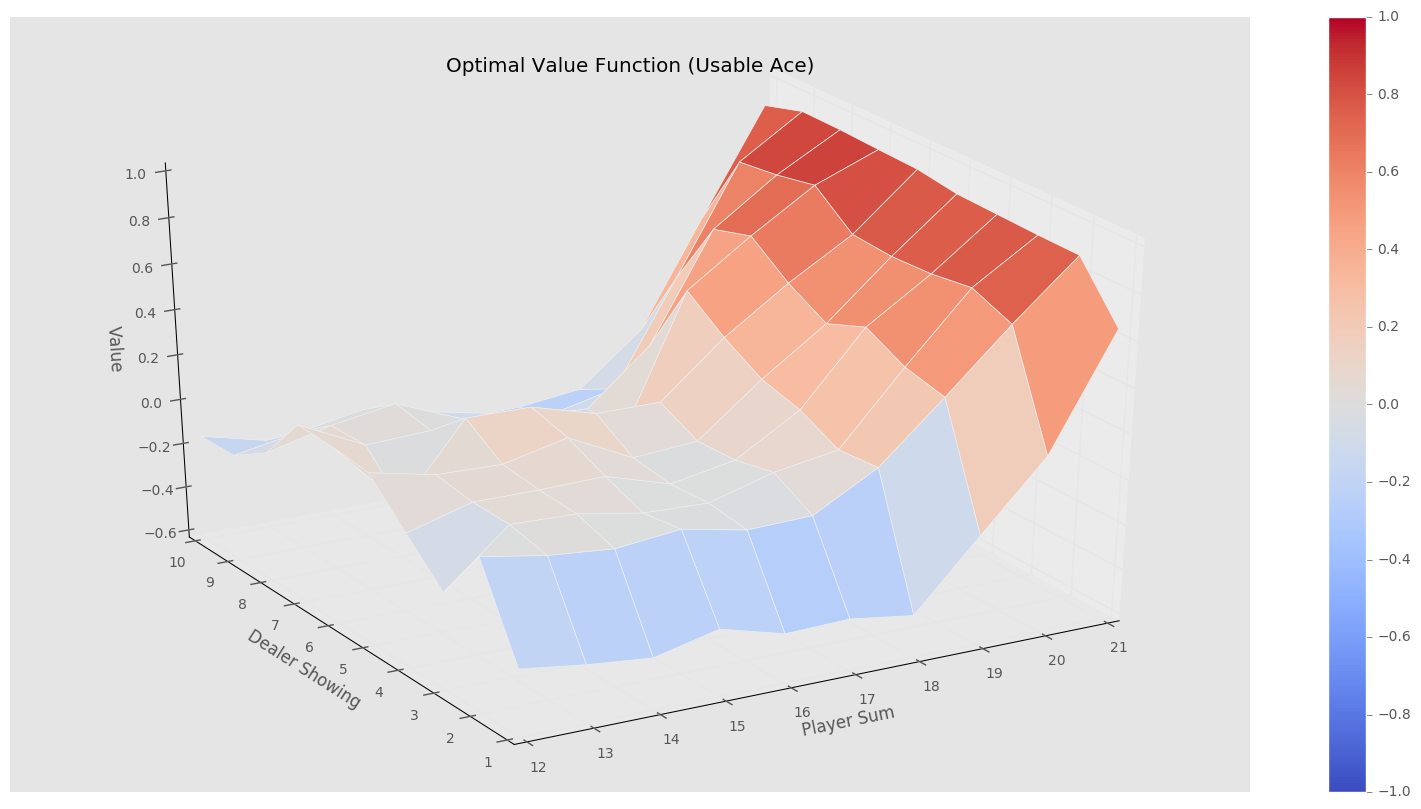

In [31]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    print state
    print np.argmax(actions)
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")

In [22]:
Q

defaultdict(<function __main__.<lambda>>,
            {(12, 1, False): array([-0.73529412, -0.5283386 ]),
             (12, 1, True): array([-0.85714286, -0.33027523]),
             (12, 2, False): array([-0.29666925, -0.3490364 ]),
             (12, 2, True): array([-0.31707317,  0.05785124]),
             (12, 3, False): array([-0.25732268, -0.29218107]),
             (12, 3, True): array([-0.19607843, -0.66666667]),
             (12, 4, False): array([-0.19895163, -0.33864542]),
             (12, 4, True): array([-0.23636364, -0.03333333]),
             (12, 5, False): array([-0.18878773, -0.25877193]),
             (12, 5, True): array([-0.00653595,  0.13636364]),
             (12, 6, False): array([-0.17697431, -0.19512195]),
             (12, 6, True): array([ 0.        ,  0.15533981]),
             (12, 7, False): array([-0.4527027 , -0.24876604]),
             (12, 7, True): array([-0.5       ,  0.16239316]),
             (12, 8, False): array([-0.56435644, -0.30359387]),
     

In [23]:
env.reset()

(19, 3, False)

In [29]:
state = env.reset()
print state
print policy(state)


(13, 4, False)
[ 0.95  0.05]
